<a href="https://colab.research.google.com/github/Panchol211/Ip_Core_week_9/blob/main/IP_weeK9_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**K-NEAREST NEIGHBOR AND NAIVE BAYERS MODELS**##

##Problem Statement ##

Implementation of K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier to see which model performs better and under which conditions 

##Understanding the Business Context##


Working on a titanic dataset and a spambase dataset.

From titanic dataset we want to predict the survival rate of the people who where involved in that Titanic accident 

For the spambase dataset, we want to predict who will can the message be classifer as a spam or a genuine message


##Defining metrices of success##

I would developed a model that can attain an accuracy of over 80% and challenge my findings to see how best i could have improved my model for a better prediction.



##Expreimental Design##

Titanic Data set and SpamBase dataset be used

Perform exploratory on the data and feature enginering 

Build the model and compare their performance 


**Loading libraries to be used to analysis these datasets**

In [1]:
# Imports

# pandas
import pandas as pd
# numpy
import numpy as np
# pandas
import pandas_profiling as pp
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

In [2]:
# Loading the spam dataset
spam = pd.read_csv("spambase.data")

In [3]:
# Viewing the top of the dataset
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
# Viewing the bottom of the datatset
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
# Checking the size of the dataset
spam.shape

(4600, 58)

In [6]:
# Checking the size of the set
spam.size

266800

In [7]:
# Information about the datatset
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [8]:
# Describing the data
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [9]:
# Checking for Duplicates in the set
spam.duplicated().sum()

391

In [10]:
# dropping duplicate values 
spam.drop_duplicates(keep=False,inplace=True)

In [11]:
# Checking to confirm they have been removed
spam.duplicated().sum()

0

In [12]:
# Checking for missing values in the  set
spam.isna().sum()


0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

There are no missing values

Visualization and graphing 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


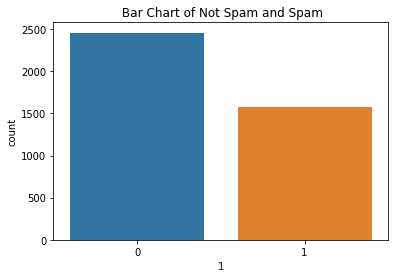

In [13]:
## Countplot for the target variable Not Spam and Spam
sns.countplot(spam["1"])
plt.title(" Bar Chart of Not Spam and Spam")
plt.show()

No spam are more compare to the spam messages 

##Building and Implementing the model##


##**Naive Bayes classifier**##

#Base Model gaussian 


#Working with A test Size of 0.2

In [14]:
""# Splitting the dataset x and y..
X = spam.iloc[:,:57
             ]
# .values.reshape(-1,1)
y = spam.iloc[:,-1]


In [15]:
# Test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
mscaler = StandardScaler()
mscaler.fit(X_train)

X_train = mscaler.transform(X_train)
X_test = mscaler.transform(X_test)

In [17]:
# Importing
from sklearn.naive_bayes import GaussianNB

In [18]:
# Trainin our model
model = GaussianNB()  
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
# prediction
predicted = model.predict(X_test)

In [20]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[340 136]
 [ 11 319]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       476
           1       0.70      0.97      0.81       330

    accuracy                           0.82       806
   macro avg       0.83      0.84      0.82       806
weighted avg       0.86      0.82      0.82       806



Gaussian recored an accuracy of 82%

##Gaussian performing at 0.3

In [21]:
# Test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [22]:
# Scaling
from sklearn.preprocessing import StandardScaler
mscaler = StandardScaler()
mscaler.fit(X_train)

X_train = mscaler.transform(X_train)
X_test = mscaler.transform(X_test)

In [23]:
# Importing
from sklearn.naive_bayes import GaussianNB

In [24]:
# Trainin our model
model = GaussianNB()  
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
# prediction
predicted = model.predict(X_test)

In [26]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[340 136]
 [ 11 319]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       476
           1       0.70      0.97      0.81       330

    accuracy                           0.82       806
   macro avg       0.83      0.84      0.82       806
weighted avg       0.86      0.82      0.82       806



The accuracy of the Gaussian Naive bayes has decreased from 82% to 75%when the test data was split 0.7/0.3

#Base Model 

##Bernoulli Naive Bayes Classifier

In [27]:
# Import
from sklearn.naive_bayes import MultinomialNB

In [28]:
# train test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [29]:
from sklearn.naive_bayes import BernoulliNB

In [30]:
 # Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB()

# Train model
model.fit(X_train, y_train)

# model score
model.score(X_train, y_train)

0.8879925535215638

In [31]:
# Prediction
ypredi = model.predict(X_test)

In [32]:
# Accuracy Summary
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypredi))
print(classification_report(y_test, ypredi))

[[472  37]
 [ 49 248]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       509
           1       0.87      0.84      0.85       297

    accuracy                           0.89       806
   macro avg       0.89      0.88      0.88       806
weighted avg       0.89      0.89      0.89       806



Bernoulli Naive Bayes accuracy is 89% at 0.8/0.2

# Working with A test Size of 0.3

In [33]:
# train test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [34]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB()

# Train model
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [35]:
# model score
model.score(X_train, y_train)

0.8900709219858156

In [36]:
# Predict
ypredb = model.predict(X_test)

In [37]:
# Accuracy Summary
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypredb))
print(classification_report(y_test, ypredb))

[[696  50]
 [ 84 379]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       746
           1       0.88      0.82      0.85       463

    accuracy                           0.89      1209
   macro avg       0.89      0.88      0.88      1209
weighted avg       0.89      0.89      0.89      1209



### with sample size of 0.3 Bernoulli Naive Bayes recorded an accuracy of 89%

# Working with A test Size of 0.4

In [38]:
# train test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [39]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB()

# Train model
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [40]:
# model score
model.score(X_train, y_train)

0.8911874224244932

In [41]:
# Predict
ypredb = model.predict(X_test)

In [42]:
# Accuracy Summary
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypredb))
print(classification_report(y_test, ypredb))

[[895  67]
 [111 539]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       962
           1       0.89      0.83      0.86       650

    accuracy                           0.89      1612
   macro avg       0.89      0.88      0.88      1612
weighted avg       0.89      0.89      0.89      1612



### with sample size of 0.4 Bernoulli Naive Bayes recorded an accuracy of 89%

It can be noted that using this dataset Bernoulli Naive Bayes is not affecting by the 3 testing split of 80/20, 70/30 and 60/40.
The accuracy remains the same at 89% 

We can conclude that  Bernoulli Naive Bayes performed better than Gaussian Naives Bayes on this dataset

## **Challenging the solution**


My thinking is, is there anyway the accuarcy of prediction can be improved 
Am going to use XGBoost 

In [43]:
from xgboost import XGBClassifier

In [44]:
#predicting with xgboost
Model_main = XGBClassifier(n_estimators = 100, learning_rate = 0.25)
## Fitting our model in the x and y variables
Model_main.fit(X_test, y_test)

# Calculating Feature Importance

print(Model_main.feature_importances_)
importance = pd.DataFrame({'feature':X.columns,'importance':np.round(Model_main.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
ten = importance.head(10)


# make predictions for test data

y_pred = Model_main.predict(X_test)
predicting = [round(value) for value in y_pred]
# Model Accuracy
print('Accuracy is :', Model_main.score(X_test, y_test) * 100)

[0.00514532 0.00585092 0.00368546 0.         0.01573291 0.00655374
 0.14302193 0.01888869 0.00247577 0.00509941 0.01298688 0.00616409
 0.00334281 0.         0.         0.04660176 0.0089702  0.0070917
 0.00454546 0.00501326 0.02930333 0.0075167  0.01700525 0.03339931
 0.05342229 0.00891117 0.03224153 0.03157353 0.00497793 0.
 0.         0.         0.00380214 0.         0.00647577 0.00501179
 0.03393682 0.         0.00385356 0.         0.         0.01755236
 0.02182646 0.00451287 0.01262153 0.03722156 0.         0.00610236
 0.00897743 0.00383843 0.         0.07726138 0.16047406 0.00478847
 0.02511021 0.02395303 0.02315839]
Accuracy is : 97.64267990074443


The outcome indicates that if we had implement xgboostclassifier on dataset it would have performed better than both the Guassian Naive Bayes and  Bernoulli Naive Bayes with an accuracy of 97.64%

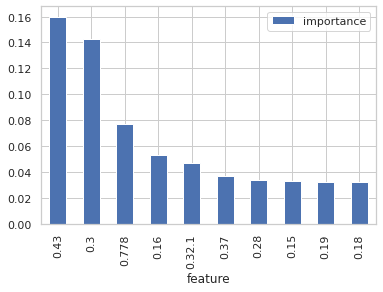

In [45]:
# Feature Importance Visualization
sns.set(style = 'whitegrid', context = 'notebook')
ten.plot.bar()
plt.show()

The idea is to see which features are important in this dataset, the level of importancy increases 

##I would like to implement the xgboost model to see if there are changes to the accuracy  on the important features only##

In [46]:
# the x values are for the important features only 
X = spam[["0.43","0.3","0.778","0.16","0.32","0.37","0.28","0.15","0.19","0.18"]].values
y = spam["1"].values

In [47]:
# train test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [48]:
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

In [49]:
# Creating Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB()

# Train model
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [50]:
# model score
model.score(X_train, y_train)

0.8986346710798511

In [51]:
# Predict
ypredc = model.predict(X_test)

In [52]:
# Accuracy imports
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypredc))
print(classification_report(y_test, ypredc))

[[924  38]
 [122 528]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       962
           1       0.93      0.81      0.87       650

    accuracy                           0.90      1612
   macro avg       0.91      0.89      0.89      1612
weighted avg       0.90      0.90      0.90      1612



 Bernoulli model got an accuracy of 90% at 0.4, after using xgboost compared to get important features to 89% when xgboost was not used 

### Gussian recored an accuracy of about an average of 82% compared to Bernolli which scored about 89%, seems that the bernouli classification  performed better.

##Overview##

Data exploration was done , duplicated values where removed, missing values were replaced with mode of the data in they respective columns

Outliers and data distribution was also addressed 



##Modelling##

I used based model and performed feature importance 


##Model Tunning ##

cross validation was used to i dentified the best model 


##**Observations**##

**Titanic dataset**

There was outliers in the fare, this is due to different classes in the flight so these outliers were not dropped 

There were more men who survive the tragedy than femals 

In the dataset there was higher number of people who didn't survive who were age 20 to 30 years, this could be attributed to the fact that this age bracket were the majority in the Tatanic ship

##**Cross Validation**##

10-fold cross validation tells us that K=7 results in the lowest validation error.

After parameter tuning The accuracy score came to 62% Out of 179 people, 111 where predicted correctly


##**Naïve Classifier**##

spambase Dataset

About 391 duplicates where identified There were no missing values

Modeling

A base model for Gaussian resulted in an accuracy score of 82% at 80/20
A base model for Bernoulli resulted in an accuracy score of 89%

Show that Bernoulli was better Gaussian recorded an accuracy of about an average of 82% compared to Bernoulli which scored about 89%, seems that the

Bernoulli classification performed better, predicted as sparm or not spam

After challenging the solution

I used xgboost and the prediction results were 90%  indicating that the model can be improved by applying xgboost.